# Perceptron

In this notebook we describe the very first model of feedforward Neural Network, the Perceptron. The structure of the notebook is then:

- [Theoretical Analysis](#s1)
    - [Algorithm](#s1.1)
    - [Practical Tips](#s1.2)
- [Implementation in Python](#s2)
- [Mini-challenge](#s3)

##  <a class="anchor" id='s1'> Theoretical Analysis </a> 

In the context of machine learning, the __Perceptron__ is an algorithm for supervised learning of binary classifiers. We remind that a binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. In more geometrical terms, a linear classsifier is a model that is able to divide the two classes in the input vector space of features, with an hyperplane. 

In the context of Neural Network , the Perceptron is the simplest feedforward Neural Network and does not contain any hidden layer, which means it only consists of a single layer of output nodes. 

Historically, the very first step towards the perceptron, and in general towards the artificial neuron, was taken by Warren McCulloch and Walter Pitts in 1943 inspired by neurobiology, created a model known as McCulloch-Pitts Neuron. 
In the MP Neuron Model, all the inputs have the same weight while calculating the outcome and the bias parameter can only take fewer values i.e., the parameter space for finding the best parameter is limited.
In 1958 Frank Rosenblatt proposed the Perceptron, a more generalized computational model than the McCulloch-Pitts Neuron. The important feature in the Rosenblatt proposed perceptron was the introduction of weights for the inputs.

Thus, the basic artificial perceptron we are going to describe can be represented by

<div>
<img width=500 src='images/perc.png' /> 
</div>

###  <a class="anchor" id='s1.1'> Algorithm </a> 

As we already said the perceptron is the simplest type of feedforward neural network, i.e. a feedforward NN with no hidden layers or units. Thus, a perceptron has only an input layer and an output layer. In order to describe and define the neural net and its algrithm, we have define, beyond the number of layers and the type of net, the activation functions used and the loss function. Historically, the perceptron's output has been binary, meaning it outputs a value of $0$ or $1$. We therefore recall some definition in order to be more formal and clear:

\begin{align*}
x_i&:\quad\text{$i$-th $(p+1)$-dimensional training input vector}\,\left(1,x_{1i},\cdots, x_{pi}\right)\\
y_i&:\quad\text{$i$-th training output vector}\\
w&:\quad\text{$(p+1)$-dimensional weight vector}\,\left(w_0,w_{1},\cdots, w_{p}\right)\\
o_i&:\quad\text{perceptron $i$-th output value}
\end{align*}

The activation function we will use is the binary step function, defined as

\begin{align*}
H(z)=\begin{cases} 0, &  z<0 \\ 1, & z\geq 0\end{cases}
\end{align*}

More generally, a perceptron can use other activation functions, like the sigmoid or linear functions. The loss function we will use the cross entropy loss

\begin{align*}
L(y_i,\hat{y}_i)=-y_i\log\hat{y}_i-(1-y_i)\log(1-\hat{y}_i)
\end{align*}

The learning algorithm is simple and it goes as follows. For each observation the perceptron take as input the input value $x_i$ and it weights them with $w_i$. Then it passes this scalar $z_i$ through the activation function $H(z_i)$ that produces the output $o_i$. Then we the perceptron outputs are compared to the desired output $y_i$ thanks to the loss function $L$. Once the cost function has been computed we have to find the optimal $w$ in order to minimize the risk function $\mathcal{R}$. The step described so far can be summarized as

0. Randomly inizialize $w$
1. $z_i=w_i\cdot x_i$
2. $o_i=H(z_i)$
3. $L(y_i,o_i)=-y_i\log o_i-(1-y_i)\log(1-o_i)$
4. $\mathcal{R}(w)=\sum_{i=1}^N L(y_i,H(w_i\cdot x_i))$

where we have shown the explicitly the dependance of $\mathcal{R}(w)$ on the weights $w$ through the activation function. $\mathcal{R}(w)$ is tipically minimized using gradient descents, meaning the perceptron adjust $w$ in the direction of the negative gradient of the risk function, in order to minimize it. This iterative process reduces the value of the error function until it converges on a value, usually a local minimum. The values of the weights $w$ are inizialized randomly as shown in the point 1 of the pseudo code above, and then are update according to the equation

\begin{align*}
w_{n+1}=w_n-\eta\left .\frac{\partial\mathcal{R}(w)}{\partial w}\right |_{w=w_n}
\end{align*}

where $w_n$ are the values of $w$ after the $n$-th iteration, and $\eta$ is the learning rate which controls the step size gradient descent takes each iteration, typically chosen to be a small value. After we update the weight we repeat the steps 0-4 and we reupdate  the weights and so on until we reach the number of __Epochs__ (iterations) we set a priori. 

The weight delta is calculate using the __delta rule__ that is a special case of __backpropagation__ that we explain in the introductionary notebook to Neural Networks. 

###  <a class="anchor" id='s1.2'> Practical Tips </a> 

It was mentioned earlier that single-layer perceptrons are linear classifiers. That is, they can only learn linearly separable patterns. Linearly separable patterns are datasets or functions that can be separated by a linear boundary (a line or hyperplane). It has been shown, for example, that it was impossible for a perceptron to learn even simple non-linearly separable functions such as the [XOR function](https://en.wikipedia.org/wiki/XOR_gate#Analytical_representation). Many other (indeed, most other) functions are not linearly separable, so what is needed is an extension to the perceptron. The obvious extension is to add more layers of units so that there are nonlinear computations in between the input and output.

##  <a class="anchor" id='s2'> Implementation in Python </a> 

The classe `Perceptron` of the module `sklearn.linear_model` are:

`Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, eta0=1.0, n_jobs=None, random_state=0, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False)`


Since it's a class is composed by __parameters__, __attributes__ and __method__. The official page where all the details can be found is [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron)

##  <a class="anchor" id='s3'> Mini-Challenge </a> 

In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import Perceptron 
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('data/heart.csv')
df.shape

(303, 14)

In [5]:
df.sample(n=5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
116,41,1,2,130,214,0,0,168,0,2.0,1,0,2,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3,1


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('target',axis=1), df.target, shuffle=True, train_size=0.8, random_state=42)

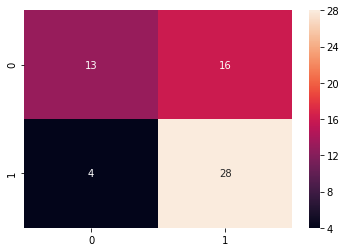

In [10]:
model=Perceptron()
model.fit(X_train,y_train)

sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True)

In [11]:
print('The accuracy of the SVC is',accuracy_score(y_test, model.predict(X_test)))

The accuracy of the SVC is 0.6721311475409836
